In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import plot_date
from prophet import Prophet
from datetime import timedelta
import matplotlib.dates as mdates
from calendar import month_abbr
import calendar
from sklearn.metrics import mean_absolute_error



In [5]:
# Read the data
df = pd.read_csv('/Users/zeynepkaya/PycharmProjects/LSDI-Project-/data/day_ahead_energy_prices.csv', parse_dates=['Datetime'])
'''
# Filter data for the last 6 months
end_date = df['Datetime'].max()
start_date = end_date - timedelta(days=180)
df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)].reset_index(drop=True)
 '''
df


,Datetime,hourly day-ahead energy price
0,2024-10-29 22:00:00+00:00,103.09
1,2024-10-29 21:00:00+00:00,118.08
2,2024-10-29 20:00:00+00:00,124.05
3,2024-10-29 19:00:00+00:00,140.60
4,2024-10-29 18:00:00+00:00,203.82
...,...,...
83876,2018-10-01 02:00:00+00:00,47.59
83877,2018-10-01 01:00:00+00:00,47.38
83878,2018-10-01 00:00:00+00:00,51.41
83879,2018-09-30 23:00:00+00:00,56.10


In [6]:
# Rename columns for Prophet 
df.rename(columns={'Datetime': 'ds', 'hourly day-ahead energy price': 'y'}, inplace=True)

# Ensure the datetime column is correctly formatted
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.tz_localize(None)  # Remove timezone information


### The Prophet model 

22:09:58 - cmdstanpy - INFO - Chain [1] start processing
22:10:35 - cmdstanpy - INFO - Chain [1] done processing


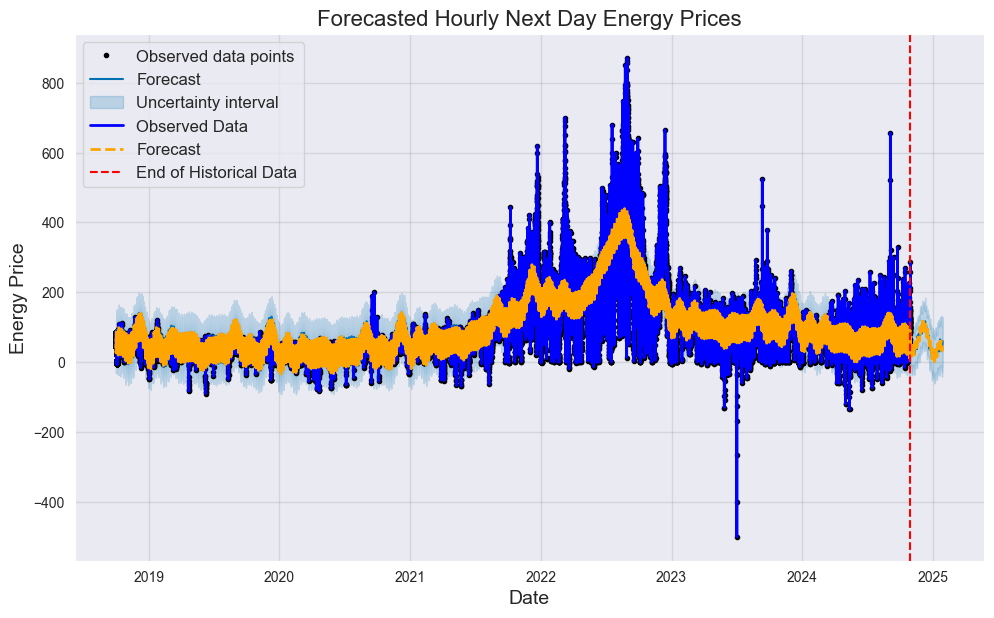

In [4]:
# Initialize the Prophet model
m = Prophet()
m.fit(df)

# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90)  # For 90 days ahead

# Make predictions
forecast = m.predict(future)

# Plot the results
fig1 = m.plot(forecast)

# Add the legend manually
ax1 = fig1.gca()  # Get the axes object for the forecast plot
ax1.plot(df['ds'], df['y'], label='Observed Data', color='b', linewidth=2)  # Plot actual data in blue
ax1.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange', linestyle='--', linewidth=2)  # Plot forecast in orange

# Add a vertical line indicating the end of historical data
end_date = df['ds'].max()  
plt.axvline(x=end_date, color='red', linestyle='--', label='End of Historical Data')

# Add title and labels for the forecast plot
plt.title('Forecasted Hourly Next Day Energy Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy Price', fontsize=14)

# Display the legend
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()


### Calculate Biweekly Average Prices

In [5]:
# Calculate Biweekly Average Prices
biweekly_avg = df.resample('2W', on='ds').mean().reset_index()
biweekly_avg.columns = ['ds', 'y']

# Ensure the datetime column is correctly formatted
biweekly_avg['ds'] = pd.to_datetime(biweekly_avg['ds'])
biweekly_avg['ds'] = biweekly_avg['ds'].dt.tz_localize(None)  # Remove timezone information

biweekly_avg.columns

Index(['ds', 'y'], dtype='object')

22:10:40 - cmdstanpy - INFO - Chain [1] start processing
22:10:40 - cmdstanpy - INFO - Chain [1] done processing


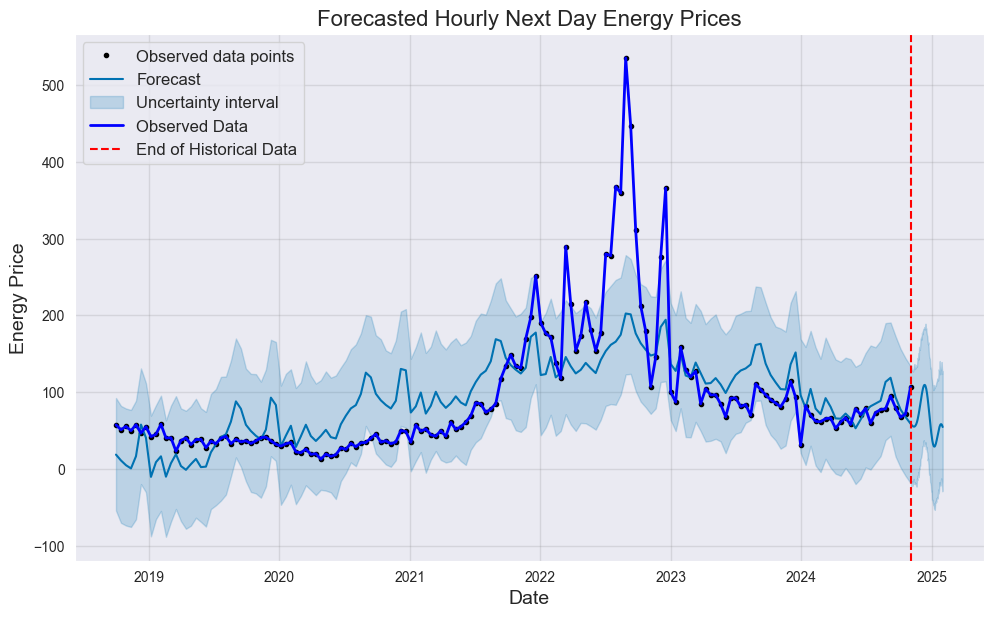

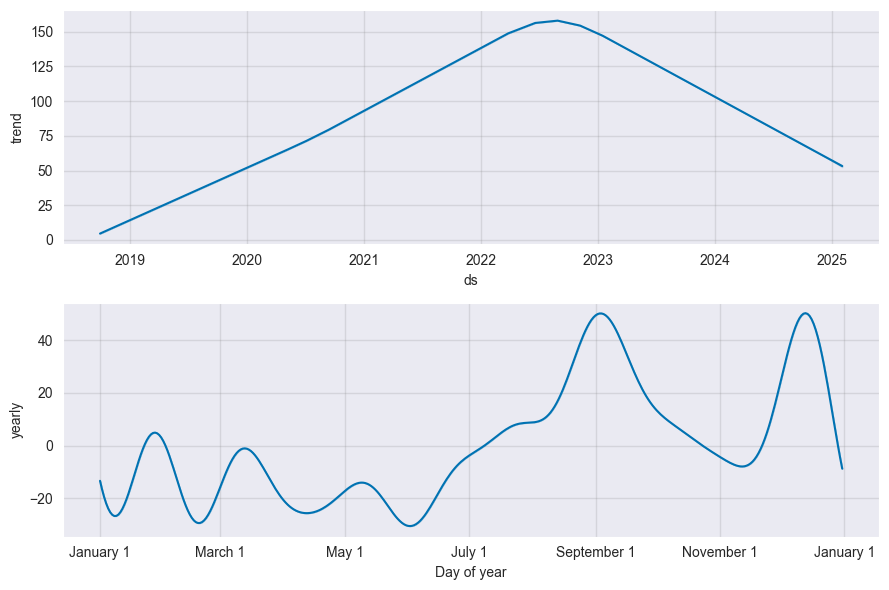

In [6]:
# Initialize the Prophet model
m = Prophet()
m.fit(biweekly_avg)

# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90) 

# Make predictions
forecast = m.predict(future)

# Plot the results
fig3 = m.plot(forecast)
ax1 = fig3.gca()  # Get the axis object for the forecast plot

# Plot the observed data
ax1.plot(biweekly_avg['ds'], biweekly_avg['y'], label='Observed Data', color='b', linewidth=2)  # Add observed data in blue

# Add a vertical line indicating the end of historical data
end_date = biweekly_avg['ds'].max()  # End of historical data
plt.axvline(x=end_date, color='red', linestyle='--', label='End of Historical Data')

# Add title and labels for the forecast plot
plt.title('Forecasted Hourly Next Day Energy Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy Price', fontsize=14)

# Display the legend to indicate observed data, forecast, and the vertical line
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()

fig4 = m.plot_components(forecast)
plt.show()


### Predict 29.10.2024

In [6]:
train_data = df
print(train_data.head())

                   ds       y
0 2024-10-29 22:00:00  103.09
1 2024-10-29 21:00:00  118.08
2 2024-10-29 20:00:00  124.05
3 2024-10-29 19:00:00  140.60
4 2024-10-29 18:00:00  203.82


In [7]:
# Initialize Prophet model with German holidays
model = Prophet()
model.fit(train_data)  # Fit the model on the training data

# Create a dataframe for forecasting only the target date, October 29, 2024
future = pd.DataFrame({
    'ds': pd.date_range(start='2024-10-29 00:00:00', end='2024-10-29 22:00:00', freq='h')
})
forecast = model.predict(future)

# 49s 445ms 

22:26:16 - cmdstanpy - INFO - Chain [1] start processing
22:26:52 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future_df = pd.DataFrame(forecast, columns=['ds'] + ['yhat'])
future_df

,ds,yhat
0,2024-10-29 00:00:00,45.166298
1,2024-10-29 01:00:00,40.478353
2,2024-10-29 02:00:00,39.268484
3,2024-10-29 03:00:00,44.393045
4,2024-10-29 04:00:00,54.206201
5,2024-10-29 05:00:00,63.215895
6,2024-10-29 06:00:00,66.210146
7,2024-10-29 07:00:00,62.005117
8,2024-10-29 08:00:00,53.550756
9,2024-10-29 09:00:00,44.797461


In [9]:
# Actual values for October 29, 2024
actual_data = {
    'ds': pd.to_datetime([
        '2024-10-29 00:00:00', '2024-10-29 01:00:00', '2024-10-29 02:00:00', '2024-10-29 03:00:00',
        '2024-10-29 04:00:00', '2024-10-29 05:00:00', '2024-10-29 06:00:00', '2024-10-29 07:00:00',
        '2024-10-29 08:00:00', '2024-10-29 09:00:00', '2024-10-29 10:00:00', '2024-10-29 11:00:00',
        '2024-10-29 12:00:00', '2024-10-29 13:00:00', '2024-10-29 14:00:00', '2024-10-29 15:00:00',
        '2024-10-29 16:00:00', '2024-10-29 17:00:00', '2024-10-29 18:00:00', '2024-10-29 19:00:00',
        '2024-10-29 20:00:00', '2024-10-29 21:00:00', '2024-10-29 22:00:00'
    ]),
    'y': [
        100.04, 98.83, 98.17, 100.02, 113.1, 127.38, 157.73, 151.32,
        129.69, 120.7, 112.97, 105.45, 117.73, 135.94, 172.26, 212.72,
        285.8, 257.44, 203.82, 140.6, 124.05, 118.08, 103.09
    ]
}

actual_df = pd.DataFrame(actual_data)
actual_df

,ds,y
0,2024-10-29 00:00:00,100.04
1,2024-10-29 01:00:00,98.83
2,2024-10-29 02:00:00,98.17
3,2024-10-29 03:00:00,100.02
4,2024-10-29 04:00:00,113.10
5,2024-10-29 05:00:00,127.38
6,2024-10-29 06:00:00,157.73
7,2024-10-29 07:00:00,151.32
8,2024-10-29 08:00:00,129.69
9,2024-10-29 09:00:00,120.70


In [10]:
future_df

,ds,yhat
0,2024-10-29 00:00:00,45.166298
1,2024-10-29 01:00:00,40.478353
2,2024-10-29 02:00:00,39.268484
3,2024-10-29 03:00:00,44.393045
4,2024-10-29 04:00:00,54.206201
5,2024-10-29 05:00:00,63.215895
6,2024-10-29 06:00:00,66.210146
7,2024-10-29 07:00:00,62.005117
8,2024-10-29 08:00:00,53.550756
9,2024-10-29 09:00:00,44.797461


In [ ]:
from sklearn.metrics import mean_squared_error
 # Extract only the predicted values for comparison

# Merge predicted values with the actual values
future_df = future_df.merge(actual_df, on='ds', how='left')  # Ensure merge works as intended

# Calculate Mean Squared Error (MSE) ## USE ROOT MEAN SQUARE ERROR 
# Calculate Mean Squared Error (MSE) and convert to Root Mean Squared Error (RMSE)
mse = mean_squared_error(future_df['y'], future_df['yhat'])
rmse = np.sqrt(mse)

# Print the Root Mean Squared Error (RMSE)
print(f"Root Mean Squared Error (RMSE) for October 29, 2024: {rmse:.2f}")

###### Root Mean Squared Error (RMSE) for October 29, 2024: 104.69


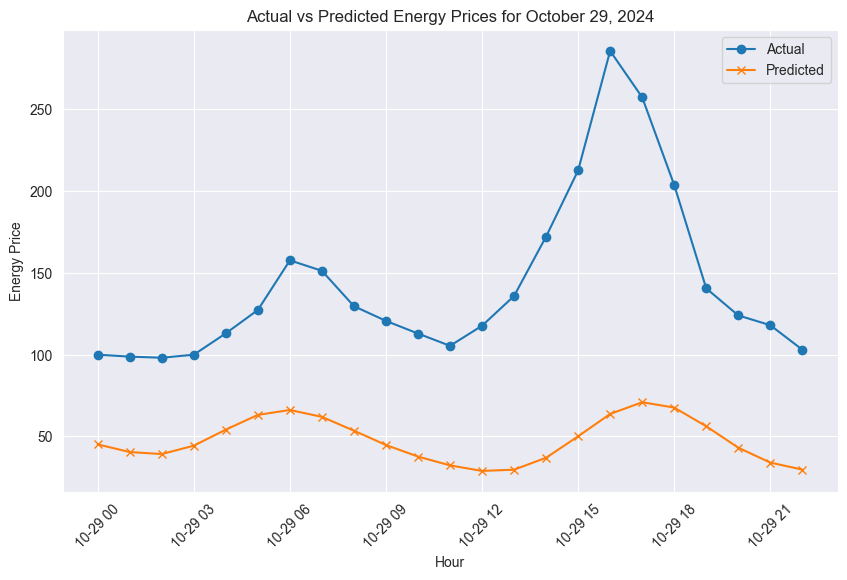

In [12]:
# plot the actual and predicted values 
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['y'], label='Actual', marker='o')  # Use 'y' for actual values
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted',
            marker='x')  # Use 'yhat' for predicted values
plt.xlabel('Hour')
plt.ylabel('Energy Price')
plt.title('Actual vs Predicted Energy Prices for October 29, 2024')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



### Add Weather Data as Regressors 

In [7]:
actual_data = {
    'ds': pd.to_datetime([
        '2024-10-29 00:00:00', '2024-10-29 01:00:00', '2024-10-29 02:00:00', '2024-10-29 03:00:00',
        '2024-10-29 04:00:00', '2024-10-29 05:00:00', '2024-10-29 06:00:00', '2024-10-29 07:00:00',
        '2024-10-29 08:00:00', '2024-10-29 09:00:00', '2024-10-29 10:00:00', '2024-10-29 11:00:00',
        '2024-10-29 12:00:00', '2024-10-29 13:00:00', '2024-10-29 14:00:00', '2024-10-29 15:00:00',
        '2024-10-29 16:00:00', '2024-10-29 17:00:00', '2024-10-29 18:00:00', '2024-10-29 19:00:00',
        '2024-10-29 20:00:00', '2024-10-29 21:00:00', '2024-10-29 22:00:00'
    ]),
    'y': [
        100.04, 98.83, 98.17, 100.02, 113.1, 127.38, 157.73, 151.32,
        129.69, 120.7, 112.97, 105.45, 117.73, 135.94, 172.26, 212.72,
        285.8, 257.44, 203.82, 140.6, 124.05, 118.08, 103.09
    ]
}

actual_df = pd.DataFrame(actual_data)
actual_df

,ds,y
0,2024-10-29 00:00:00,100.04
1,2024-10-29 01:00:00,98.83
2,2024-10-29 02:00:00,98.17
3,2024-10-29 03:00:00,100.02
4,2024-10-29 04:00:00,113.10
5,2024-10-29 05:00:00,127.38
6,2024-10-29 06:00:00,157.73
7,2024-10-29 07:00:00,151.32
8,2024-10-29 08:00:00,129.69
9,2024-10-29 09:00:00,120.70


In [8]:
# Step 1: Load the energy prices and weather data
energy_data = pd.read_csv('/Users/zeynepkaya/PycharmProjects/LSDI-Project-/data/day_ahead_energy_prices.csv')  # Adjust file path if needed
weather_data = pd.read_csv('/Users/zeynepkaya/PycharmProjects/LSDI-Project-/data/daily_weather.csv')  # Adjust file path if needed

# Step 2: Convert datetime columns to datetime type and remove timezone if necessary
energy_data['Datetime'] = pd.to_datetime(energy_data['Datetime']).dt.tz_localize(None)
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.tz_localize(None)

# Step 3: Rename columns to match Prophet's expected column names
energy_data = energy_data.rename(columns={'Datetime': 'ds', 'hourly day-ahead energy price': 'y'})
weather_data = weather_data.rename(columns={'date': 'ds'})  # Use 'ds' to merge on datetime

# Step 4: Merge data on datetime ('ds') column
merged_data = pd.merge(energy_data, weather_data, on='ds', how='left')


In [9]:
# Step 5: Check for and handle missing values if needed
merged_data[['temperature_2m', 'cloud_cover', 'wind_speed_10m']] = merged_data[['temperature_2m', 'cloud_cover', 'wind_speed_10m']].interpolate(method='linear')

# Step 6: Initialize the Prophet model and add weather variables as regressors
model = Prophet()
model.add_regressor('temperature_2m')
model.add_regressor('cloud_cover')
model.add_regressor('wind_speed_10m')

# Step 7: Fit the model with energy prices and weather data
model.fit(merged_data[['ds', 'y', 'temperature_2m', 'cloud_cover', 'wind_speed_10m']])

# Step 8: Create a future DataFrame for October 29, 2024, with hourly intervals
future_dates = pd.date_range(start='2024-10-29 00:00:00', end='2024-10-29 22:00:00', freq='h')
future = pd.DataFrame(future_dates, columns=['ds'])

22:31:44 - cmdstanpy - INFO - Chain [1] start processing
22:32:17 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Step 9: Merge future dates with the corresponding weather data for October 29, 2024
weather_29_oct_2024 = weather_data[weather_data['ds'].dt.date == pd.to_datetime('2024-10-29').date()]
future = pd.merge(future, weather_29_oct_2024[['ds', 'temperature_2m', 'cloud_cover', 'wind_speed_10m']], on='ds', how='left')

# Step 10: Make predictions using the Prophet model
forecast = model.predict(future)

# Step 11: Extract forecasted energy prices
predicted_prices = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


In [11]:
predicted_prices

,ds,yhat,yhat_lower,yhat_upper
0,2024-10-29 00:00:00,56.851079,5.600320,106.411446
1,2024-10-29 01:00:00,59.117458,6.991165,110.003501
2,2024-10-29 02:00:00,57.247770,10.627599,107.250847
3,2024-10-29 03:00:00,61.029087,7.718267,108.107784
4,2024-10-29 04:00:00,76.622917,28.900411,126.988024
5,2024-10-29 05:00:00,76.812473,24.658917,122.393748
6,2024-10-29 06:00:00,81.874098,34.137099,138.641472
7,2024-10-29 07:00:00,78.200230,26.230704,126.559148
8,2024-10-29 08:00:00,68.415761,18.850573,118.517101
9,2024-10-29 09:00:00,68.160231,13.960626,121.697851


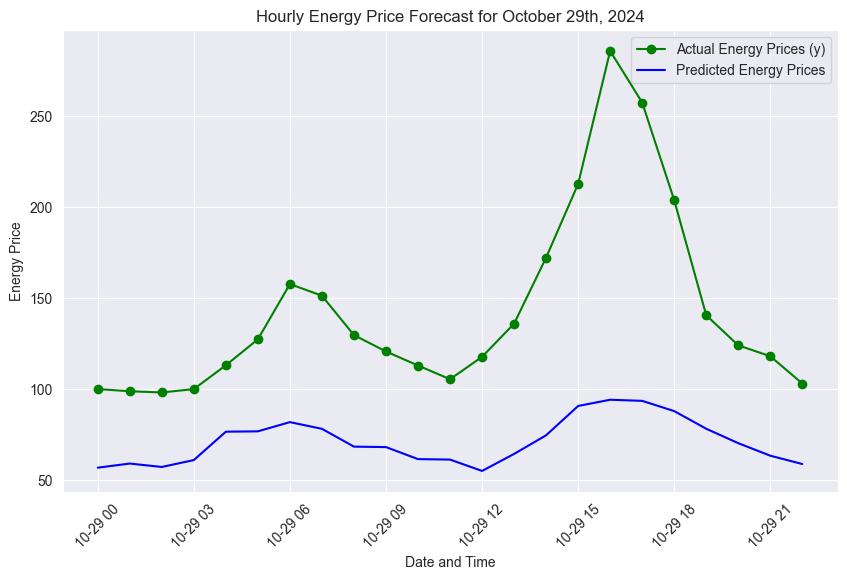

In [12]:
# Plot the actual and predicted energy prices
plt.figure(figsize=(10, 6))

# Plot actual energy prices (y)
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Energy Prices (y)', color='green', marker='o')

# Plot predicted energy prices (yhat)
# Step 12: Plot the forecast for October 29, 2024
plt.plot(predicted_prices['ds'], predicted_prices['yhat'], label='Predicted Energy Prices', color='blue')

plt.xlabel('Date and Time')
plt.ylabel('Energy Price')
plt.title('Hourly Energy Price Forecast for October 29th, 2024')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [15]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_data['y'], predicted_prices['yhat'])

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
# Print the Root Mean Squared Error (RMSE)
print(f"Root Mean Squared Error (RMSE) for October 29, 2024: {rmse:.2f}")

Root Mean Squared Error (RMSE) for October 29, 2024: 82.07


##### Root Mean Squared Error (RMSE) for October 29, 2024: 82.07


### Add Market Mix Data as Regressors 

In [18]:
# daily_market_mix.csv 
market_mix_data = pd.read_csv('/Users/zeynepkaya/PycharmProjects/LSDI-Project-/data/daily_market_mix.csv', 
                              header=None, 
                              names=['date', 'energy_type', 'ratio'])

# Date to datetime format
market_mix_data['date'] = pd.to_datetime(market_mix_data['date'], format='%Y_%m_%d').dt.date

# make it better shape
market_mix = market_mix_data.pivot(index='date', columns='energy_type', values='ratio').reset_index()

# Pivot sonucunda oluşan sütunların başlıklarını düzelt (MultiIndex olmasından dolayı)
market_mix.columns.name = None

# <%1 usage 
low_usage_columns = [
    'Fossil coal-derived gas', 
    'Fossil oil', 
    'Geothermal', 
    'Waste non-renewable', 
    'Waste renewable', 
    'Others'
]

# dropping
market_mix = market_mix.drop(columns=low_usage_columns)

market_mix

,date,Biomass,Fossil brown coal / lignite,Fossil gas,Fossil hard coal,Hydro Run-of-River,Hydro water reservoir,Nuclear,Solar,Wind offshore,Wind onshore
0,2018-09-30,0.084003,0.276555,0.045899,0.083582,0.025494,0.001765,0.145407,0.122252,0.054534,0.107327
1,2018-10-01,0.071889,0.248031,0.066501,0.155288,0.024663,0.001096,0.124279,0.050521,0.058221,0.153644
2,2018-10-02,0.065939,0.185866,0.044868,0.089039,0.026328,0.001460,0.111727,0.033324,0.054801,0.347772
3,2018-10-03,0.075207,0.134336,0.039823,0.072395,0.026933,0.001723,0.117523,0.058700,0.058149,0.372011
4,2018-10-04,0.073768,0.218592,0.077263,0.208638,0.026223,0.003827,0.127534,0.074153,0.036635,0.105277
...,...,...,...,...,...,...,...,...,...,...,...
2219,2024-10-27,0.115360,0.241127,0.099467,0.069600,0.059160,0.002168,NaN,0.092073,0.072115,0.215867
2220,2024-10-28,0.086731,0.220940,0.128876,0.093137,0.043598,0.001783,NaN,0.078154,0.092605,0.223466
2221,2024-10-29,0.094737,0.258043,0.191799,0.135005,0.044735,0.003750,NaN,0.082999,0.028301,0.127330
2222,2024-10-30,0.095683,0.267081,0.195668,0.148895,0.044256,0.003840,NaN,0.061133,0.045042,0.104278


In [19]:
#when nuclear start being NaN  
market_mix['date'][market_mix['Nuclear'].isnull().idxmax()] 
#datetime.date(2023, 4, 16). nuclear energy production officially ended on April 16, 2023 in Germany. 

#fulfill the Nuclear NaN values with 0
market_mix['Nuclear'] = market_mix['Nuclear'].fillna(0) 

In [20]:
merged_data

,ds,y,temperature_2m,cloud_cover,wind_speed_10m
0,2024-10-29 22:00:00,103.09,12.533,100.0,6.522362
1,2024-10-29 21:00:00,118.08,12.583,100.0,6.601363
2,2024-10-29 20:00:00,124.05,12.583,100.0,7.329338
3,2024-10-29 19:00:00,140.60,12.783,100.0,8.748075
4,2024-10-29 18:00:00,203.82,12.683,100.0,9.546790
...,...,...,...,...,...
83876,2018-10-01 02:00:00,47.59,4.483,26.0,7.235910
83877,2018-10-01 01:00:00,47.38,4.683,37.0,6.489992
83878,2018-10-01 00:00:00,51.41,5.033,38.0,8.089993
83879,2018-09-30 23:00:00,56.10,5.583,18.0,6.479999


In [23]:
merged_data['date'] = merged_data['ds'].dt.date

In [24]:
# merge merged_data and market_mix
merged_data = pd.merge(merged_data, market_mix, on='date', how='left')

# data columns not needed
merged_data = merged_data.drop(columns=['date'])


In [25]:
merged_data

,ds,y,temperature_2m,cloud_cover,wind_speed_10m,Biomass,Fossil brown coal / lignite,Fossil gas,Fossil hard coal,Hydro Run-of-River,Hydro water reservoir,Nuclear,Solar,Wind offshore,Wind onshore
0,2024-10-29 22:00:00,103.09,12.533,100.0,6.522362,0.094737,0.258043,0.191799,0.135005,0.044735,0.003750,0.000000,0.082999,0.028301,0.127330
1,2024-10-29 21:00:00,118.08,12.583,100.0,6.601363,0.094737,0.258043,0.191799,0.135005,0.044735,0.003750,0.000000,0.082999,0.028301,0.127330
2,2024-10-29 20:00:00,124.05,12.583,100.0,7.329338,0.094737,0.258043,0.191799,0.135005,0.044735,0.003750,0.000000,0.082999,0.028301,0.127330
3,2024-10-29 19:00:00,140.60,12.783,100.0,8.748075,0.094737,0.258043,0.191799,0.135005,0.044735,0.003750,0.000000,0.082999,0.028301,0.127330
4,2024-10-29 18:00:00,203.82,12.683,100.0,9.546790,0.094737,0.258043,0.191799,0.135005,0.044735,0.003750,0.000000,0.082999,0.028301,0.127330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83876,2018-10-01 02:00:00,47.59,4.483,26.0,7.235910,0.071889,0.248031,0.066501,0.155288,0.024663,0.001096,0.124279,0.050521,0.058221,0.153644
83877,2018-10-01 01:00:00,47.38,4.683,37.0,6.489992,0.071889,0.248031,0.066501,0.155288,0.024663,0.001096,0.124279,0.050521,0.058221,0.153644
83878,2018-10-01 00:00:00,51.41,5.033,38.0,8.089993,0.071889,0.248031,0.066501,0.155288,0.024663,0.001096,0.124279,0.050521,0.058221,0.153644
83879,2018-09-30 23:00:00,56.10,5.583,18.0,6.479999,0.084003,0.276555,0.045899,0.083582,0.025494,0.001765,0.145407,0.122252,0.054534,0.107327


In [26]:
# Prophet model
model = Prophet()

# weather
model.add_regressor('temperature_2m')
model.add_regressor('cloud_cover')
model.add_regressor('wind_speed_10m')

# add energy types as regressors 
for energy_type in market_mix.columns[1:]:  # first column is 'date'
    model.add_regressor(energy_type)


In [27]:
# Step 2: Train the model
# Filter relevant columns for model fitting
model_columns = ['ds', 'y', 'temperature_2m', 'cloud_cover', 'wind_speed_10m'] + list(market_mix.columns[1:])
model.fit(merged_data[model_columns])

# Step 3: Prepare the future dataframe
# Create a future DataFrame for October 29, 2024, with hourly intervals
future_dates = pd.date_range(start='2024-10-29 00:00:00', end='2024-10-29 22:00:00', freq='h')
future_df = pd.DataFrame(future_dates, columns=['ds'])


22:41:12 - cmdstanpy - INFO - Chain [1] start processing
22:42:11 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Step 4: Merge weather and market mix data for October 29, 2024
# Extract corresponding weather data for October 29, 2024
weather_29_oct_2024 = weather_data[weather_data['ds'].dt.date == pd.to_datetime('2024-10-29').date()]

# Get the latest available market mix data and assume it applies to the future date
latest_market_mix_data = market_mix[market_mix['date'] == market_mix['date'].max()].iloc[0]

# Combine weather and market mix data with future DataFrame
future_df = pd.merge(future_df, weather_29_oct_2024[['ds', 'temperature_2m', 'cloud_cover', 'wind_speed_10m']], on='ds', how='left')
for energy_type in market_mix.columns[1:]:
    future_df[energy_type] = latest_market_mix_data[energy_type]

# Step 5: Predict future energy prices with the trained model
forecast = model.predict(future_df)

# Step 6: Extract forecasted energy prices
predicted_prices = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [29]:
predicted_prices

,ds,yhat,yhat_lower,yhat_upper
0,2024-10-29 00:00:00,76.797763,28.025060,123.395443
1,2024-10-29 01:00:00,76.696676,25.781781,123.980470
2,2024-10-29 02:00:00,76.021715,30.242711,125.496949
3,2024-10-29 03:00:00,80.687391,31.653325,131.252715
4,2024-10-29 04:00:00,94.314582,46.592935,144.077828
5,2024-10-29 05:00:00,98.321609,50.050453,147.328291
6,2024-10-29 06:00:00,103.333011,55.962190,150.606464
7,2024-10-29 07:00:00,101.168180,53.186346,151.568057
8,2024-10-29 08:00:00,94.111871,45.769283,141.983838
9,2024-10-29 09:00:00,90.744703,42.647189,138.487930


In [30]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_data['y'], predicted_prices['yhat']))
print(f"Root Mean Square Error (RMSE) for October 29, 2024: {rmse:.2f}")

Root Mean Square Error (RMSE) for October 29, 2024: 63.16


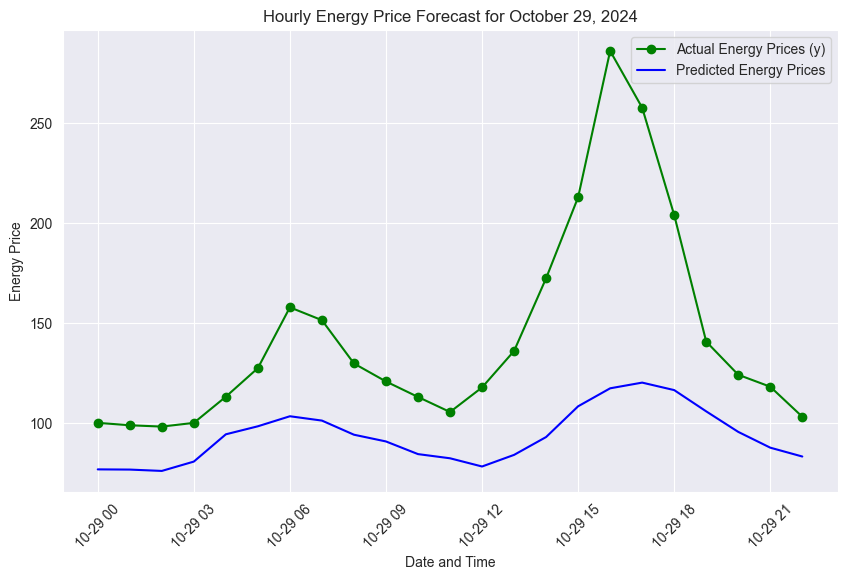

                    ds        yhat  yhat_lower  yhat_upper
0  2024-10-29 00:00:00   76.797763   28.025060  123.395443
1  2024-10-29 01:00:00   76.696676   25.781781  123.980470
2  2024-10-29 02:00:00   76.021715   30.242711  125.496949
3  2024-10-29 03:00:00   80.687391   31.653325  131.252715
4  2024-10-29 04:00:00   94.314582   46.592935  144.077828
5  2024-10-29 05:00:00   98.321609   50.050453  147.328291
6  2024-10-29 06:00:00  103.333011   55.962190  150.606464
7  2024-10-29 07:00:00  101.168180   53.186346  151.568057
8  2024-10-29 08:00:00   94.111871   45.769283  141.983838
9  2024-10-29 09:00:00   90.744703   42.647189  138.487930
10 2024-10-29 10:00:00   84.426395   35.025060  133.695840
11 2024-10-29 11:00:00   82.339051   33.286537  128.117905
12 2024-10-29 12:00:00   78.235277   27.847521  125.640494
13 2024-10-29 13:00:00   84.039202   36.880896  133.610170
14 2024-10-29 14:00:00   92.950400   41.885072  141.083948
15 2024-10-29 15:00:00  108.306634   55.889812  154.1212

In [31]:
# Step 7: Plot the forecast for October 29, 2024, with actual data if available
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Energy Prices (y)', color='green', marker='o')
plt.plot(predicted_prices['ds'], predicted_prices['yhat'], label='Predicted Energy Prices', color='blue')

plt.xlabel('Date and Time')
plt.ylabel('Energy Price')
plt.title('Hourly Energy Price Forecast for October 29, 2024')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Print predicted prices for October 29, 2024
print(predicted_prices)


In [35]:
# Save merged_data to a CSV file
merged_data.to_csv('/Users/zeynepkaya/PycharmProjects/LSDI-Project-/data/merged_data.csv', index=False)
